In [1]:
#importing libraries
import pandas as pd 
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

In [2]:
book=pd.read_csv('D:/ExcelR/Assignments/Downloaded/Association Rules/book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


As we can see there are no null values

In [4]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 2000):
    trans.append([str(book.values[i,j]) for j in range(0, 11)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)


(2000, 11)


In [5]:
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)
data.head()

,0,1
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True


## Aprior Algorithm

In [6]:
frequent_itemsets=apriori(book, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, DoItYBks, CookBks, YouthBks)"
96,0.0560,"(ArtBks, GeogBks, CookBks, YouthBks)"
97,0.0650,"(ArtBks, GeogBks, DoItYBks, CookBks)"
98,0.0510,"(YouthBks, GeogBks, DoItYBks, CookBks, ChildBks)"


In [7]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.05)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


In [8]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(ArtBks, DoItYBks, CookBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
658,(DoItYBks),"(ArtBks, CookBks, GeogBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
659,(CookBks),"(ArtBks, DoItYBks, GeogBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
660,(ArtBks),"(CookBks, DoItYBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939


### As we can see there are 661 row which is having lift>1 rule's not ok for this rows

In [9]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(GeogBks, DoItYBks, CookBks, YouthBks)",4
96,0.0560,"(ArtBks, GeogBks, CookBks, YouthBks)",4
97,0.0650,"(ArtBks, GeogBks, DoItYBks, CookBks)",4
98,0.0510,"(YouthBks, GeogBks, DoItYBks, CookBks, ChildBks)",5


### lets us see the aprior length in 1,2,3,4 which are have support more than 50%

In [10]:
a=frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.05) ]
a

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1


In [11]:
b=frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]
b

,support,itemsets,length
9,0.1650,"(YouthBks, ChildBks)",2
10,0.2560,"(CookBks, ChildBks)",2
11,0.1840,"(DoItYBks, ChildBks)",2
12,0.1515,"(RefBks, ChildBks)",2
13,0.1625,"(ArtBks, ChildBks)",2
14,0.1950,"(GeogBks, ChildBks)",2
15,0.0850,"(ItalCook, ChildBks)",2
16,0.1620,"(CookBks, YouthBks)",2
17,0.1155,"(DoItYBks, YouthBks)",2
18,0.0965,"(RefBks, YouthBks)",2


In [12]:
c=frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.05) ]
c

,support,itemsets,length
36,0.1290,"(YouthBks, CookBks, ChildBks)",3
37,0.0950,"(YouthBks, DoItYBks, ChildBks)",3
38,0.0830,"(RefBks, YouthBks, ChildBks)",3
39,0.0805,"(ArtBks, YouthBks, ChildBks)",3
40,0.0990,"(YouthBks, GeogBks, ChildBks)",3
41,0.1460,"(DoItYBks, CookBks, ChildBks)",3
42,0.1225,"(RefBks, CookBks, ChildBks)",3
43,0.1265,"(ArtBks, CookBks, ChildBks)",3
44,0.1495,"(GeogBks, CookBks, ChildBks)",3
45,0.0850,"(ItalCook, CookBks, ChildBks)",3


In [13]:
d=frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.05) ]
d

,support,itemsets,length
76,0.0820,"(DoItYBks, YouthBks, CookBks, ChildBks)",4
77,0.0680,"(RefBks, YouthBks, CookBks, ChildBks)",4
78,0.0670,"(ArtBks, YouthBks, CookBks, ChildBks)",4
79,0.0830,"(GeogBks, YouthBks, CookBks, ChildBks)",4
80,0.0530,"(RefBks, YouthBks, DoItYBks, ChildBks)",4
81,0.0510,"(ArtBks, YouthBks, DoItYBks, ChildBks)",4
82,0.0565,"(GeogBks, YouthBks, DoItYBks, ChildBks)",4
83,0.0515,"(RefBks, YouthBks, GeogBks, ChildBks)",4
84,0.0550,"(ArtBks, YouthBks, GeogBks, ChildBks)",4
85,0.0745,"(RefBks, DoItYBks, CookBks, ChildBks)",4


In [14]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

## Visulization the rules using different plots

In [15]:
#scatter plot
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

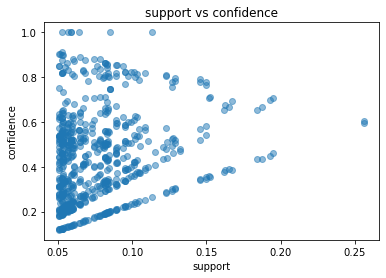

In [16]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('support vs confidence')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

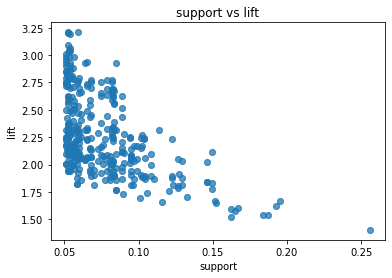

In [17]:
plt.scatter(rules['support'],rules['lift'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('support vs lift')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

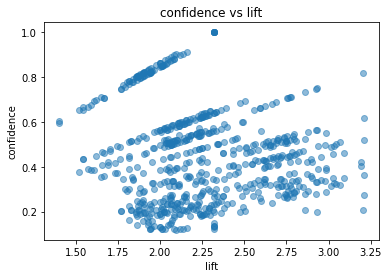

In [18]:
plt.scatter(rules['lift'],rules['confidence'],alpha=0.5)
plt.ylabel('confidence')
plt.xlabel('lift')
plt.title('confidence vs lift')
plt.show

## There are 9 Itemsets with 1 antacidents about 50% support


## There are 27 Itemsets with 2 antacidents about 50% support


## There are 40 Itemsets with 3 antacidents about 50% support


## There are 23 Itemsets with 4 antacidents about 50% support ,with 652 rules